In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
pc = pd.read_csv("petrol1_consumption.csv")
print(pc.head())

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0           9            3571            1976                         0.525   
1           9            4092            1250                         0.572   
2           9            3865            1586                         0.580   
3           8            4870            2351                         0.529   
4           8            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.005274,-0.369958,-0.387233,-0.430035
Average_income,0.005274,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.369958,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.387233,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.430035,-0.244862,0.019042,0.698965,1.000000


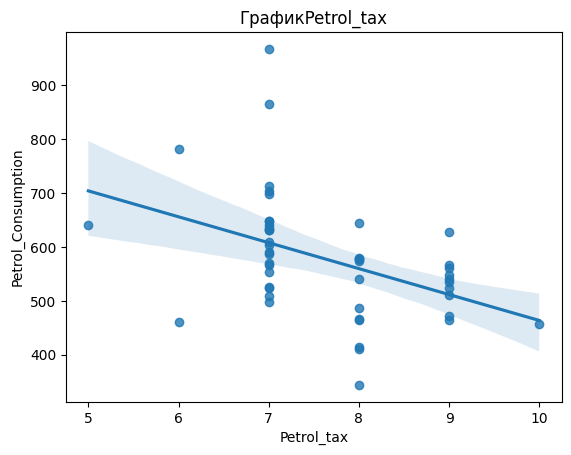

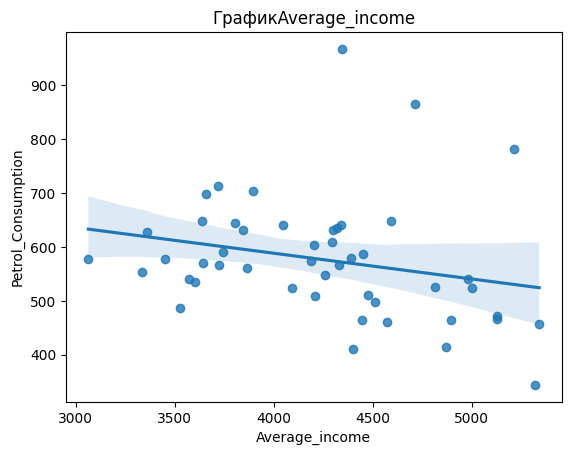

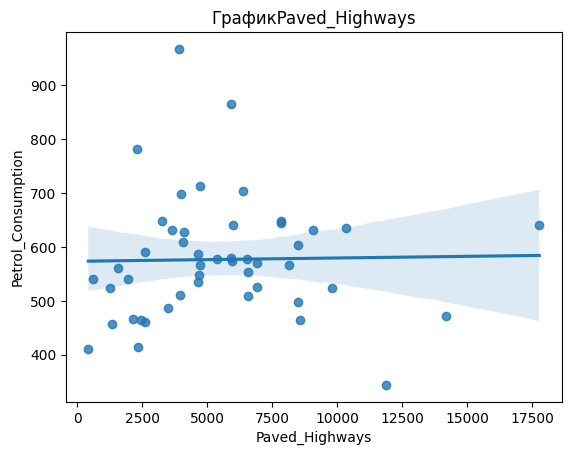

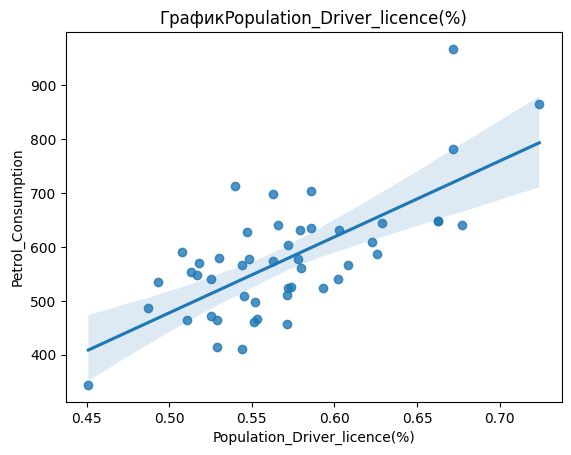

In [4]:
datas_colum = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
data_con = ['Petrol_Consumption']


for i in datas_colum:
    plt.figure()
    sns.regplot(x=i, y='Petrol_Consumption', data=pc).set(title = f"График{i}")

cor = pc.corr()
cor

[Text(0.5, 1.0, 'Кореляция')]

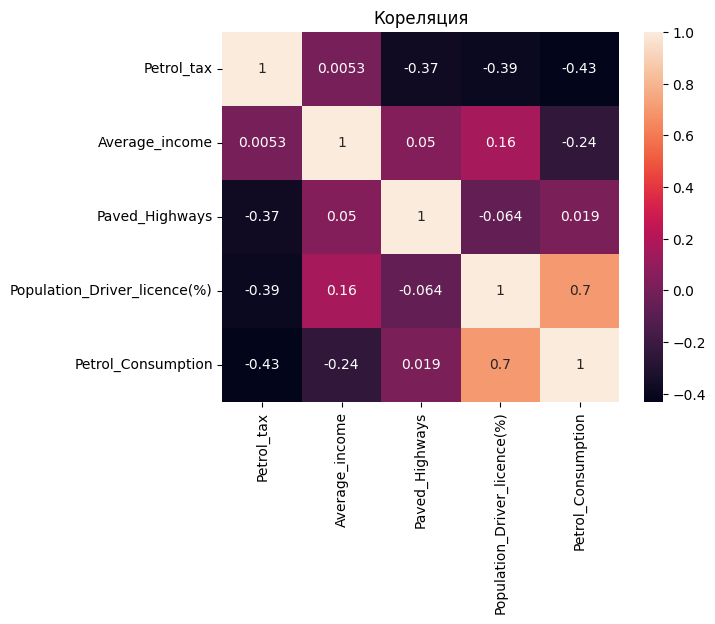

In [5]:
sns.heatmap(cor, annot=True).set(title='Кореляция')

In [6]:
y = pc["Petrol_Consumption"]
X = pc[["Petrol_tax","Average_income", "Paved_Highways", "Population_Driver_licence(%)"]]
pc.shape

(48, 5)

In [7]:
A = 48
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=A)

In [8]:
regression = LinearRegression()
regression.fit(X_train, y_train)

print("Beata_0: ", regression.intercept_)
print("Beata_n: ", regression.coef_)

Beata_0:  994.765076580846
Beata_n:  [-5.54694123e+01 -1.38522890e-01  7.21756225e-03  9.43643227e+02]


In [9]:
y_pred = regression.predict(X_test)

res = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
res.head()

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean_absolute_error{mae:.2f}")
print(f"mean_squared_error{mse:.2f}")
print(f"Root mean squared error{rmse:.2f}")

Mean_absolute_error79.53
mean_squared_error10606.98
Root mean squared error102.99
